In [1]:
import networkx as nx
import numpy as np
from src import airport_graph_loader

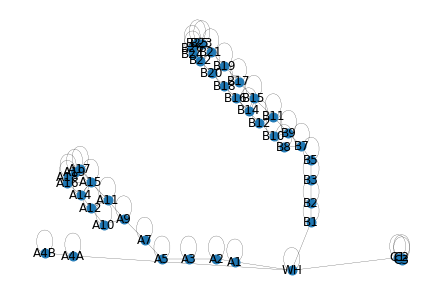

In [2]:
G_airport = airport_graph_loader.load_sparse('data/gate_pos.csv')
node_pos = nx.get_node_attributes(G_airport, 'pos')
nx.draw(G_airport, node_pos, width=0.2, node_size=80, with_labels=True)

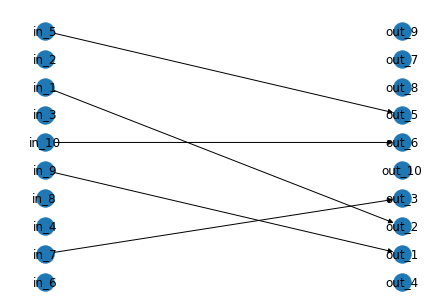

In [3]:
# we will call units in our coordinate system Scaled Airport Distance (SAD)
# 1 SAD = 242.288888889 ft

# pace units are in s^{-1}
# 1 unit of pace = 2.5 mph
# SAD / PACE = time in hours
PACE = 54.4804182335

def generate_flights(G_flights, n_flights, name_func):
    flights = [name_func(i) for i in range(n_flights)]
    gates = np.random.choice(G_airport, n_flights)
    G_flights.add_nodes_from((
        (name, {'gate': gate})
        for name, gate in zip(flights, gates)
    ))
    return flights

G_flights = nx.DiGraph()

n_inbound_flights = 10
inbound_flights = generate_flights(
    G_flights, 
    n_inbound_flights, 
    name_func=lambda i: f'in_{i+1}')

n_outbound_flights = 10
outbound_flights = generate_flights(
    G_flights, 
    n_outbound_flights, 
    name_func=lambda i: f'out_{i+1}')

n_connecting = 5
in_connecting = np.random.choice(inbound_flights, n_connecting, replace=False)
out_connecting = np.random.choice(outbound_flights, n_connecting, replace=False)

for in_flight, out_flight in zip(in_connecting, out_connecting):
    in_gate = G_flights.nodes[in_flight]['gate']
    out_gate = G_flights.nodes[out_flight]['gate']
    dist = nx.shortest_path_length(G_airport, in_gate, out_gate, weight='weight')
    time = dist / PACE
    G_flights.add_edge(in_flight, out_flight, weight=time)

# TODO: need to add arrival/departure times to each of the flights

nx.draw(G_flights, with_labels=True, pos=nx.bipartite_layout(G_flights, inbound_flights))
# nx.draw(G_flights, with_labels=True)